# Tutorial Episode 1: Setting up preprocessing

In this notebook, I show you how to change the preprocessing applied to factor analysis input data

In [1]:
import os
import sys
import string

sys.path.append(os.path.pardir)

%matplotlib inline
import numpy as np
import pandas as pd

from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

## Synthesizing fake data

This function will generate samples of fake data and store it in the `n_samples-by-n_features` matrix `data`, just like we did in Episode 0. But then we do a couple of new things:

* We scale the first 10 feature by 2, resulting in unequal signal variance across features but still keeping the same correlation stucture

* Place the data into a pandas DataFrame and name each of the columns with a string. We will pass this dataframe directly into the facotr analysis, and the output will have each of the features properly labelled.

In [2]:
def make_random_data(n_samp=10000, n_feat=100):
    """
    make some random data with correlated features
    """
    data = np.random.randn(n_samp, n_feat)
    
    signal_width = 10
    signal_overlap = 2
    step_size = signal_width - signal_overlap
    for i in range(0, data.shape[1], step_size):
        shared_signal = 0.3*np.random.randn(n_samp, 1)
        data[:, i:(i+signal_width)] += shared_signal
    return data

data = make_random_data()
data[:, :10] *= 2

column_names = [
    "{}{}".format(i, string.lowercase[i % len(string.lowercase)])
    for i in range(data.shape[1])]

df_data = pd.DataFrame(
    data,
    columns=column_names
    )

## Setting up a factor analysis pipeline

The function `run_pipeline` will take the DataFrame of data as input and do a factor analysis. We now have two input arguments that control how the data will be preprocessed:
* `preproc_demean` will determine if each dimension should be de-meaned
* `prepoc_scale` will determine is each dimension should be scaled to unit standard deviation

Setting both to `True` will result in components a correlation matrix for extracting features. If `preproc_demean=True` and `preproc_demean=False`, you'll get a covariance matrix.

These same preprocessing steps will be applied to any other data that you feed into the FacorAnalysis object using the method `get_component_scores`.

If you want to come up with your own crazy `num_dimension-by-nu_dimension` feature association matrix, go ahead. Calculate it in python ahead of time, and pass it into the FactorAnalysis object using the method `load_data_cov` (rather than `load_data_samples`).

In [3]:
def run_pipeline(data, preproc_demean=True, preproc_scale=True, **kwargs):
    
    retain_method='broken_stick'
    rotation_method='varimax'
    
    # Set up the factor analysis object, indiate how to calculate the
    # association matrix out of this input data.

    fa = FactorAnalysis.load_data_samples(
        data,
        preproc_demean=preproc_demean,
        preproc_scale=preproc_scale,
        **kwargs
        )

    # Extract the components
    fa.extract_components()

    # Calculate how many components to retain
    # You can use any of these methods:
    #   'top_n', 'top_pct', 'kaiser', 'broken_stick'

    fa.find_comps_to_retain(
        method=retain_method,
        **kwargs
        )

    # Once you know how many to retain, re-extract with PAF
    fa.reextract_using_paf()

    # Apply factor rotation
    # Right now there are both 'varimax' and 'quartimax'
    fa.rotate_components(
        method=rotation_method
        )

    return fa

### Demo: Extracting from a covariance matrix

As you can see, if you don't scale the input dimensions, the results will over-emphasize the contributions from high-variance features (i.e., the first 10 components). Sometimes this is good, sometimes this is bad. I can't tell you how to live your life.

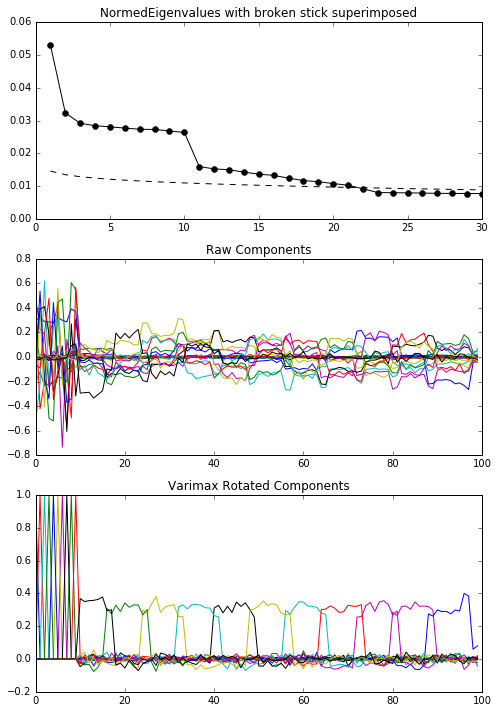

In [4]:
fa_unscaled = run_pipeline(
    df_data,
    retain_method='broken_stick',
    preproc_demean=False,
    preproc_scale=False
)

fig = fa_plotting.graph_summary(fa_unscaled)

### Demo: Extracting from a correlation matrix

Now if you scale each component before doing the factor analysis, you'll do your work on a correlation matrix and get the familiar pattern we saw in Episode 0.

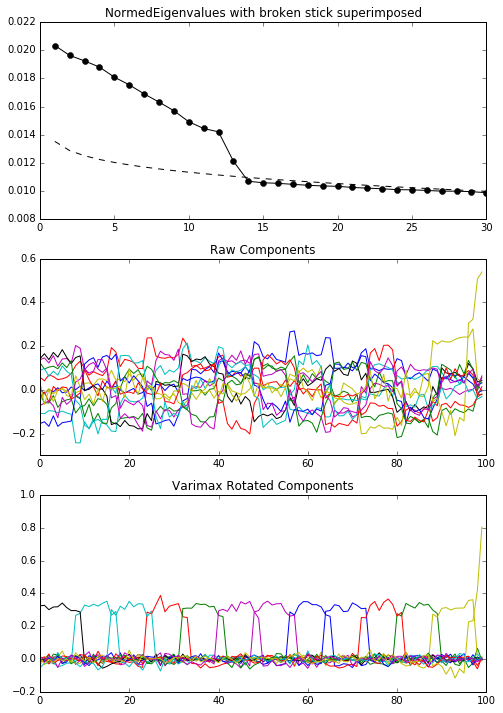

In [5]:
fa_scaled = run_pipeline(
    df_data,
    retain_method='broken_stick',
    preproc_demean=False,
    preproc_scale=True
)

fig = fa_plotting.graph_summary(fa_scaled)

### Bonus!

Because we fed in labels for each of our dimensions, we can use the `text_summary` function in the plotting module to print out a description of which features had the strongest loadings on each component

In [6]:
fa_plotting.text_summary(fa_scaled, top_n_items=4)

COMPONENT 0 (index 0)
	35.0: 59h
	34.9: 60i
	33.1: 61j
	33.0: 62k
COMPONENT 1 (index 1)
	34.4: 85h
	33.8: 82e
	33.3: 87j
	32.8: 86i
COMPONENT 2 (index 2)
	38.7: 27b
	33.7: 31f
	33.1: 26a
	33.0: 30e
COMPONENT 3 (index 3)
	35.2: 15p
	33.9: 14o
	33.4: 12m
	32.9: 10k
COMPONENT 4 (index 4)
	35.3: 51z
	33.7: 54c
	33.6: 53b
	33.6: 50y
COMPONENT 5 (index 5)
	36.1: 97t
	35.7: 96s
	31.3: 91n
	31.1: 95r
COMPONENT 6 (index 6)
	34.1: 5f
	32.7: 1b
	32.3: 0a
	31.8: 4e
COMPONENT 7 (index 7)
	34.2: 70s
	33.1: 66o
	32.8: 71t
	32.4: 67p
COMPONENT 8 (index 8)
	33.8: 35j
	33.4: 37l
	33.2: 36k
	32.0: 39n
COMPONENT 9 (index 9)
	36.6: 78a
	35.0: 75x
	34.5: 77z
	33.3: 79b
COMPONENT 10 (index 10)
	35.2: 20u
	33.6: 22w
	33.5: 23x
	32.1: 18s
COMPONENT 11 (index 11)
	35.1: 47v
	34.9: 45t
	33.5: 46u
	33.3: 43r
COMPONENT 12 (index 12)
	80.3: 99v
	41.9: 98u
